# Mental Disorders in Tech Workers Draft 3

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display

# Load and Display Raw Data

In [2]:
db_survey = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

In [3]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

# Colors

In [4]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"
male_color = "royalblue"
female_color = "pink"
graph_color1 = "indianred"
graph_color2 = "slategrey"

# Tech Workers in Tech Companies

In [22]:
df_Answer9 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 9 AND AnswerText = '1'",
    db_survey
)

,AnswerText,SurveyID,UserID,QuestionID
0,1,2014,1,9
1,1,2014,3,9
2,1,2014,4,9
3,1,2014,5,9
4,1,2014,6,9
5,1,2014,7,9
6,1,2014,8,9
7,1,2014,9,9
8,1,2014,10,9
9,1,2014,11,9


In [6]:
df_Answer13 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 13 AND AnswerText = '1'",
    db_survey
)

In [7]:
df_TechinTech = pd.merge(df_Answer13, df_Answer9 , on='UserID', how='inner')

In [8]:
Total_TechinTech = df_TechinTech.count()

# Tech Workers with Family History of Mental Disorders

In [9]:
df_Answer6 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 6 AND AnswerText = 'Yes'",
    db_survey
)

In [10]:
df_FamilyDisorder = pd.merge(df_TechinTech, df_Answer6 , on='UserID', how='inner')

In [11]:
Total_FamilyDisorder = df_FamilyDisorder.count()

In [12]:
Total_NoFamilyDisorder = Total_TechinTech - Total_FamilyDisorder 

# Tech Workers with Past Mental Disorders

In [13]:
df_Answer34 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 34 AND AnswerText = 'Yes'",
    db_survey
)

In [14]:
df_PastDisorder = pd.merge(df_TechinTech, df_Answer34 , on='UserID', how='inner')

In [15]:
Total_PastDisorder = df_PastDisorder.count()
Total_PastDisorder.UserID

371

In [16]:
Total_NoPastDisorder = Total_TechinTech - Total_PastDisorder 

# Tech Workers with Current Mental Disorders

In [17]:
df_Answer33 = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 33 AND AnswerText = 'Yes'",
    db_survey
)

In [18]:
df_CurrentDisorder = pd.merge(df_TechinTech, df_Answer33 , on='UserID', how='inner')

In [19]:
Total_CurrentDisorder = df_CurrentDisorder.count()

In [20]:
Total_NoCurrentDisorder = Total_TechinTech - Total_CurrentDisorder 

# Mental Disorders in Tech Workers

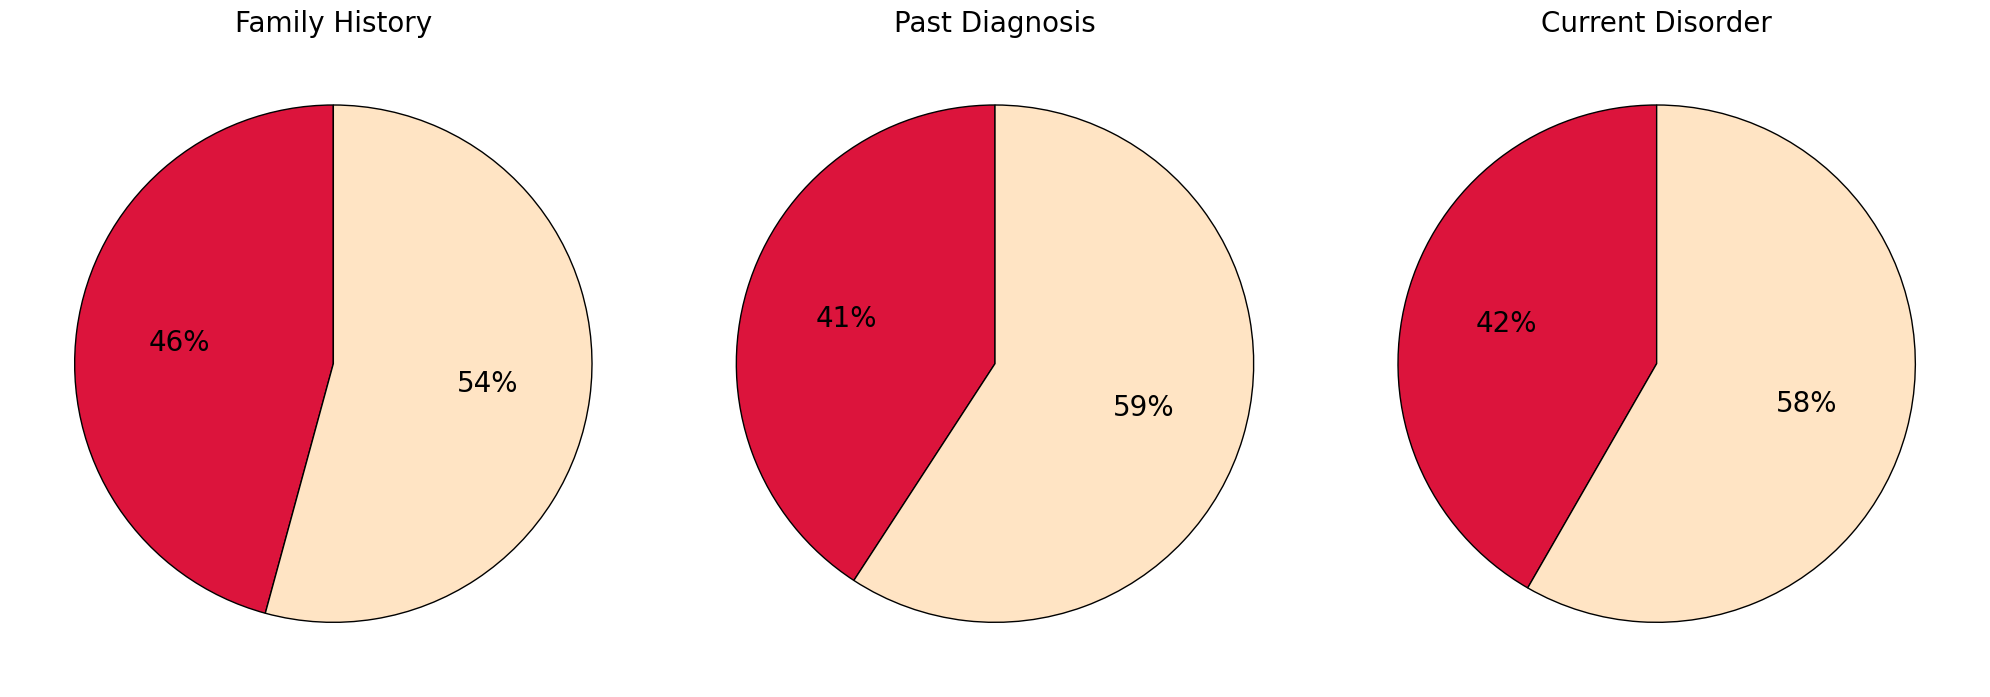

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

data_FamilyDisorder = [Total_FamilyDisorder.UserID, Total_NoFamilyDisorder.UserID]
data_PastDisorder = [Total_PastDisorder.UserID, Total_NoPastDisorder.UserID]
data_CurrentDisorder = [Total_CurrentDisorder.UserID, Total_NoCurrentDisorder.UserID]

labels_MentalDisorder = ["Yes", "No"]


ax1.pie(
    data_FamilyDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
    
)

ax2.pie(
    data_PastDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
   
)

ax3.pie(
    data_CurrentDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},

)

ax1.set_title('Family History', fontsize=20)
ax2.set_title('Past Diagnosis', fontsize=20)
ax3.set_title('Current Disorder', fontsize=20)

plt.tight_layout()

plt.show()